In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing the dataset 
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv.zip')

In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.shape

(20800, 5)

In [5]:
#dataset classes 
dataset['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

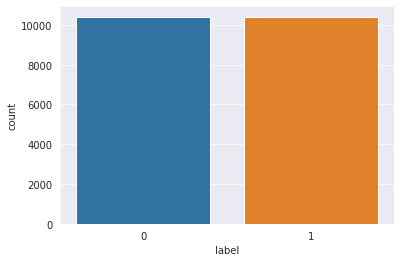

In [6]:
sn.set_style(style='darkgrid')
graph = sn.countplot(x='label',data=dataset)
plt.show()

In [7]:
#checking for null values
dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#droping the null values
dataset.dropna(inplace=True)

In [9]:
dataset.shape

(18285, 5)

In [10]:
#Creating Independent and depe74741ndent variables 
X = dataset.iloc[:,:-1]
y = dataset['label']

In [11]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [77]:
#importing the deep learning libraries
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

In [13]:
#step1 decide vocabulary size
voc_size =10000

Text Preprocessing

In [14]:
#create one hot represantation of text
message = X.copy()

In [15]:
message.dtypes

id         int64
title     object
author    object
text      object
dtype: object

In [16]:
message.reset_index(inplace=True)

In [17]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
#data preprocessing
def text_stemming(data):
  port_stem = PorterStemmer()
  clean_text = []
  for i in range(0, len(data)):
    text = re.sub('[^a-zA-Z]', ' ',str(data['title'][i]))
    text = text.lower()
    #create list of words
    word_list = text.split()
    #remove stopwords
    word_list = [port_stem.stem(word) for word in word_list if not word in stopwords.words('english')]

    word_list = ' '.join(word_list)
    clean_text.append(word_list)
  return clean_text

In [19]:
clean_text = text_stemming(message)
clean_text[0:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

One hot Represenatation

In [20]:
#step 2  create one hot representation
onehot_repr = [one_hot(words,voc_size) for words in clean_text]

In [21]:
onehot_repr[0:5]

[[9901, 8767, 8319, 9462, 3107, 6126, 2354, 8210, 7732, 935],
 [5758, 5153, 2609, 5031, 8721, 3255, 6761],
 [4269, 1046, 4257, 9352],
 [7970, 8396, 2553, 9343, 4696, 644],
 [3080, 8721, 5756, 7486, 2777, 22, 8721, 6557, 2682, 3387]]

In [22]:
#step 3 define maxlength of senteces
max_len = 20

Embedded Representation

In [23]:
#step 4 embedded representation
embedded_repr = pad_sequences(onehot_repr,padding='post',maxlen= max_len)
print(embedded_repr)

[[9901 8767 8319 ...    0    0    0]
 [5758 5153 2609 ...    0    0    0]
 [4269 1046 4257 ...    0    0    0]
 ...
 [4836  789 9380 ...    0    0    0]
 [7531 6470 9423 ...    0    0    0]
 [ 588 1939 7658 ...    0    0    0]]


In [24]:
#step 5 decide feature dimension
feature_dimension = 40

Model Creation

In [25]:
model = Sequential()
model.add(Embedding(voc_size,feature_dimension,input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________


Bi-Directional LSTM

In [78]:
model_1 = Sequential()
model_1.add(Embedding(voc_size,feature_dimension,input_length=max_len))
model_1.add(Dropout(0.3))
model_1.add(Bidirectional(LSTM(100)))
model_1.add(Dropout(0.3))
model_1.add(Dense(1,activation='sigmoid'))
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            400000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
len(embedded_repr), y.shape

(18285, (18285,))

In [28]:
X_final  = np.array(embedded_repr)
y_final = np.array(y)

In [29]:
X_final.shape, y_final.shape

((18285, 20), (18285,))

In [30]:
#performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size =0.20, random_state=42)

Train model

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, batch_size=42)

Epoch 1/14
349/349 [==============================] - 5s 14ms/step - loss: 0.2826 - accuracy: 0.8668 - val_loss: 0.2094 - val_accuracy: 0.9122
Epoch 2/14
349/349 [==============================] - 4s 13ms/step - loss: 0.1341 - accuracy: 0.9490 - val_loss: 0.1920 - val_accuracy: 0.9188
Epoch 3/14
349/349 [==============================] - 4s 12ms/step - loss: 0.0879 - accuracy: 0.9678 - val_loss: 0.2070 - val_accuracy: 0.9232
Epoch 4/14
349/349 [==============================] - 4s 13ms/step - loss: 0.0605 - accuracy: 0.9798 - val_loss: 0.3056 - val_accuracy: 0.9161
Epoch 5/14
349/349 [==============================] - 4s 13ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.3105 - val_accuracy: 0.9193
Epoch 6/14
349/349 [==============================] - 4s 12ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.3354 - val_accuracy: 0.9158
Epoch 7/14
349/349 [==============================] - 4s 12ms/step - loss: 0.0280 - accuracy: 0.9908 - val_loss: 0.3385 - val_accuracy: 0.9147

In [32]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Model Evaluation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2082
           1       0.89      0.91      0.90      1575

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



In [34]:
print(confusion_matrix(y_test, y_pred))

[[1904  178]
 [ 146 1429]]


In [35]:
accuracy_score(y_test, y_pred)

0.911402789171452

Bi-Directional Model 

In [79]:
model_1.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=14,batch_size=42)

Epoch 1/14
349/349 [==============================] - 7s 21ms/step - loss: 0.2765 - accuracy: 0.8749 - val_loss: 0.1917 - val_accuracy: 0.9182
Epoch 2/14
349/349 [==============================] - 7s 19ms/step - loss: 0.1282 - accuracy: 0.9513 - val_loss: 0.1810 - val_accuracy: 0.9248
Epoch 3/14
349/349 [==============================] - 7s 19ms/step - loss: 0.0789 - accuracy: 0.9727 - val_loss: 0.2191 - val_accuracy: 0.9212
Epoch 4/14
349/349 [==============================] - 7s 19ms/step - loss: 0.0569 - accuracy: 0.9804 - val_loss: 0.2480 - val_accuracy: 0.9114
Epoch 5/14
349/349 [==============================] - 7s 19ms/step - loss: 0.0428 - accuracy: 0.9853 - val_loss: 0.3264 - val_accuracy: 0.9111
Epoch 6/14
349/349 [==============================] - 7s 19ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.3588 - val_accuracy: 0.9158
Epoch 7/14
349/349 [==============================] - 7s 19ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.2822 - val_accuracy: 0.9171

Evaluation of Model_1

In [84]:
y_pred1 = model_1.predict_classes(X_test)
y_pred1

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [85]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2082
           1       0.89      0.91      0.90      1575

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



In [87]:
confusion_matrix(y_test,y_pred1)

array([[1901,  181],
       [ 140, 1435]])

In [86]:
accuracy_score(y_test,y_pred1)

0.9122231337161608

Submit.csv

In [64]:
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv.zip')
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [65]:
test_data.drop(columns=['id','author'],inplace=True)
test_data.head()

,title,text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [66]:
test_data.isna().sum()

title    122
text       7
dtype: int64

In [67]:
test_data['title'] = test_data.fillna('fake news')

In [68]:
test_message = test_data.copy()
test_message.reset_index(inplace=True)
test_message.dtypes

index     int64
title    object
text     object
dtype: object

In [69]:
clean_text_test = text_stemming(test_message)

In [70]:
onehot_repr_test = [one_hot(word,voc_size) for word in clean_text_test]
onehot_repr_test[0:5]

[[7961, 9992, 360, 7423, 6966, 5992, 3922, 688, 2409, 4546, 2609],
 [5535, 6408, 3832, 8381, 8999, 2480, 3684],
 [5057, 3636, 5803, 9339, 7991, 2201, 9842, 3728, 3973, 9442],
 [2350, 4371, 9471, 9969, 2733, 2609, 8172, 2409, 4546, 2609],
 [9500, 5147, 3150, 1345, 6662]]

In [71]:
embedded_repr_test = pad_sequences(onehot_repr_test,padding='post',maxlen= max_len)
embedded_repr_test[0:5]

array([[7961, 9992,  360, 7423, 6966, 5992, 3922,  688, 2409, 4546, 2609,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [5535, 6408, 3832, 8381, 8999, 2480, 3684,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [5057, 3636, 5803, 9339, 7991, 2201, 9842, 3728, 3973, 9442,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2350, 4371, 9471, 9969, 2733, 2609, 8172, 2409, 4546, 2609,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [9500, 5147, 3150, 1345, 6662,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [72]:
embedded_repr_test.shape

(5200, 20)

In [73]:
y_pred = model.predict_classes(embedded_repr_test)
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [74]:
df = pd.DataFrame(data = y_pred)
df.columns = ['test_label']

In [76]:
df.head(20)

,test_label
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [88]:
df.to_csv('submit.csv')